In [1]:
%load_ext watermark
%watermark

2020-09-13T19:57:57-05:00

CPython 3.7.6
IPython 7.13.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-47-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)

In [3]:
datos = pd.read_csv("datos_procesamiento.csv")
datos.head()

,col_inexistente1,col2,col3,col_outliers,col_outliers2,col_categorica,col_ordinal,col_texto
0,59.0,52.0,2.232832,-50,0.771666,ratón,muy bien,Tenía en su casa una ama que pasaba de los cua...
1,31.0,74.0,0.906147,-5,1.068558,elefante,regular,"El resto della concluían sayo de velarte, calz..."
2,81.0,28.0,0.626750,-32,0.846396,ratón,muy mal,"El resto della concluían sayo de velarte, calz..."
3,34.0,16.0,0.816738,-84,0.637381,gato,mal,"Una olla de algo más vaca que carnero, salpicó..."
4,32.0,28.0,0.571131,65,4.540614,gato,bien,Tenía en su casa una ama que pasaba de los cua...


In [4]:
datos.shape

(1000, 8)

In [5]:
datos.dtypes

col_inexistente1    float64
col2                float64
col3                float64
col_outliers          int64
col_outliers2       float64
col_categorica       object
col_ordinal          object
col_texto            object
dtype: object

# Variables numéricas

## Imputación de datos

In [6]:
from sklearn import preprocessing

In [7]:
var_numericas_df = datos.select_dtypes(["int", "float"])
var_numericas_df.columns

Index(['col_inexistente1', 'col2', 'col3', 'col_outliers', 'col_outliers2'], dtype='object')

In [8]:
var_numericas_df[var_numericas_df.isnull().any(axis=1)].shape

(96, 5)

In [9]:
var_numericas_df[var_numericas_df.isnull().any(axis=1)].head()

,col_inexistente1,col2,col3,col_outliers,col_outliers2
9,NaN,53.0,2.270999,62,1.067230
10,NaN,99.0,1.394209,98,4.145716
16,NaN,50.0,0.437365,59,20.549474
17,NaN,73.0,0.324893,98,0.761684
23,NaN,85.0,3.664671,-48,3.154153


### SimpleImputer 
Modulo para imputación de datos 

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imputador = SimpleImputer(strategy="mean")

In [12]:
var_numericas_imputadas = imputador.fit_transform(var_numericas_df)

In [13]:
var_numericas_imputadas

array([[ 59.        ,  52.        ,   2.23283208, -50.        ,
          0.77166646],
       [ 31.        ,  74.        ,   0.90614714,  -5.        ,
          1.06855838],
       [ 81.        ,  28.        ,   0.62675042, -32.        ,
          0.84639576],
       ...,
       [ 19.        ,  53.        ,   0.73723413,  73.        ,
          1.34525201],
       [ 88.        ,  94.        ,   0.76008706,  68.        ,
          1.3692463 ],
       [ 94.        ,  56.        ,   1.2299403 ,  61.        ,
          0.94395714]])

In [14]:
var_numericas_imputadas_df = pd.DataFrame(var_numericas_imputadas,
                                         index=var_numericas_df.index,
                                         columns = var_numericas_df.columns)

var_numericas_imputadas_df.head(10)

,col_inexistente1,col2,col3,col_outliers,col_outliers2
0,59.000000,52.0,2.232832,-50.0,0.771666
1,31.000000,74.0,0.906147,-5.0,1.068558
2,81.000000,28.0,0.626750,-32.0,0.846396
3,34.000000,16.0,0.816738,-84.0,0.637381
4,32.000000,28.0,0.571131,65.0,4.540614
5,81.000000,4.0,1.618844,51.0,0.812940
6,57.000000,31.0,0.167880,78.0,1.235137
7,34.000000,20.0,20.229813,93.0,1.283176
8,37.000000,96.0,2.407978,54.0,1.298613
9,48.382743,53.0,2.270999,62.0,1.067230


## Estandarización
Objetivo convertir las variables a una distribución con media 0 y desviación estandar 1

In [15]:
var_numericas_df.columns

Index(['col_inexistente1', 'col2', 'col3', 'col_outliers', 'col_outliers2'], dtype='object')

In [16]:
var_numericas_df.mean()

col_inexistente1     48.382743
col2                 49.660000
col3                  1.466095
col_outliers          4.253000
col_outliers2       131.193340
dtype: float64

In [17]:
var_numericas_df.std()

col_inexistente1      27.987174
col2                  28.272668
col3                   1.732358
col_outliers          78.145901
col_outliers2       3401.164776
dtype: float64

In [18]:
escalador = preprocessing.StandardScaler()
var_numericas_imputadas_escalado_estandar = escalador.fit_transform(var_numericas_imputadas)

In [19]:
escalador.mean_

array([ 48.38274336,  49.66      ,   1.46609489,   4.253     ,
       131.19333968])

In [20]:
var_numericas_imputadas_escalado_estandar.mean(axis=0)

array([-5.86197757e-17,  1.26121336e-16, -3.81916720e-17,  3.55271368e-18,
       -3.55271368e-18])

In [21]:
var_numericas_imputadas_escalado_estandar.std(axis=0)

array([1., 1., 1., 1., 1.])

In [22]:
var_numericas_imputadas_escalado_estandar[0]

array([ 0.39921733,  0.08280686,  0.44281884, -0.69460006, -0.03836537])

Existen datasets que tienen una gran cantidad de outliers así que es posible que estandarizar usando la media y la desviación estandar no funcione bien el modelo. Para estos casos existen algunos estimadores más robustos (menos sensibles a la presencia de outliers) y emplear un [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler.fit_transform) que funciona substrayendo la mediana y escalando con el rango intercuartil IQR

In [23]:
escalador_robusto = preprocessing.RobustScaler()
var_numericas_imputadas_escalado_robusto = escalador_robusto.fit_transform(
                                                                    var_numericas_imputadas)

In [24]:
var_numericas_imputadas_escalado_robusto.mean(axis=0)

array([-3.81916720e-17, -2.85106383e-02,  4.01958704e-01,  3.04018692e-02,
        7.03130782e+01])

In [25]:
var_numericas_imputadas_escalado_robusto.std(axis=0)

array([6.33218559e-01, 6.01245275e-01, 1.38651621e+00, 7.29970260e-01,
       1.83690817e+03])

## Escalado a un rango especifico

Hay casos en los que se quiere escalar los datos a un rango, generalmente [-1,1] o [0,1]. Para esto usamos [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) que hace escalado minmax (obviamente)

In [26]:
var_numericas_imputadas.min()

-100.0

In [27]:
var_numericas_imputadas.max()

107357.85777352

In [29]:
escalador_minmax = preprocessing.MinMaxScaler()
var_numericas_imputadas_escalado_minmax = escalador_minmax.fit_transform(var_numericas_imputadas)

In [30]:
var_numericas_imputadas_escalado_minmax.max()

1.0

In [31]:
var_numericas_imputadas_escalado_minmax.min()

0.0

Hay casos en los que se necesita tener las observaciones con norma unitaria (norma L2 o euclidiana). Para esos casos Podemos usar [Normalizer]()

In [34]:
normalizador = preprocessing.Normalizer()
var_numericas_imputadas_normal = normalizador.fit_transform(var_numericas_imputadas)
var_numericas_imputadas_normal[1,:]

array([ 0.38557802,  0.92041204,  0.01127066, -0.06219   ,  0.01329073])

In [35]:
np.linalg.norm(var_numericas_imputadas_normal[1,:])

1.0

## Otras transformaciones

Para aquellos casos en los que queremos aplicar una función diferente, ya sea arbitraria o diseñada por nosotros. se utiliza [FunctionTransformer]

Por ejemplo la variable col3 no tiene una distribución normal, sino que tiene una asimetria muy marcada (es una distribución lognormal)

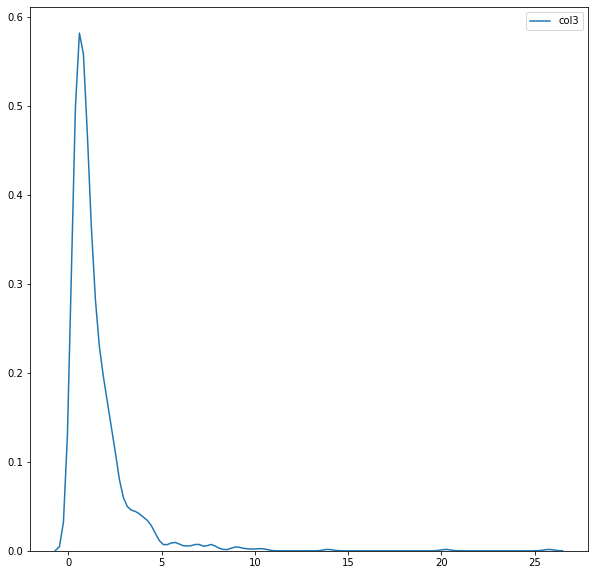

In [36]:
sns.kdeplot(datos.col3)

Una practica frecuente y sencilla es aplicar el algoritmo a esta variable para convertirla en una distribución normal

In [37]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)

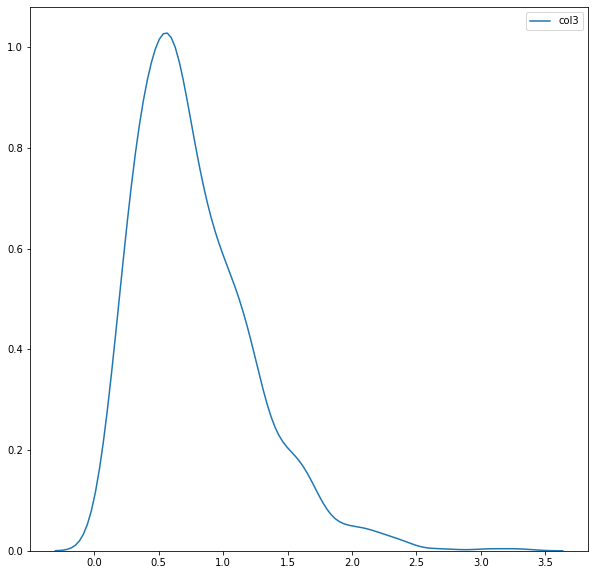

In [46]:
col3_transformada = transformer.transform(datos[["col3"]])
sns.kdeplot(col3_transformada["col3"])